# Week4 課題「大課題 ボストン住宅価格 線形回帰」

## 線形回帰とは何か

以下の観点をすべて含めて記述しましょう。

線形回帰とは何か。  
数量などの連続値をとる目的変数を予測するのに役立つのが線形回帰です。

具体的に言うと？  
駅の平均乗降客数と売上高の関係について検討したり、  
コーヒーの売り上げと来店客数の関係について検討したりできます。  
つまり、次の数値的な予想をすることができます。

分類と何か違うのか。  
回帰は、次の連続した数値の予想でした。   
例えば、そのデータの特徴量の傾向をみて(座標上に線を書いて)、具体的な数字を出す（線上から割り出す）、予測するのが回帰です。 
分類は、例えば「猫」か「否か」の二択、あるいは「１」「０」の予想です。  
例えば、花弁の数をみて、少ないとパンジー、多いとたんぽぽのように、あらかじめ与えられたクラス（ここでは、パンジーとたんぽぽ）に分けることを分類といいます。  


In [0]:
# 必要なライブラリをimportする

# data manipulation
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt

# Standardization
from scipy.stats import zscore

# データをトレーニング用、評価用に分割
from sklearn.model_selection import train_test_split

# 最小二乗線形回帰
from sklearn.linear_model import  LinearRegression

# 平均二乗誤差回帰損失
from sklearn.metrics import mean_squared_error

# 多項式基底を作成する関数
from sklearn.preprocessing import PolynomialFeatures

# ボストンの住宅価格データセット
from sklearn.datasets import load_boston

## データを取得する

In [0]:
load_boston()

## 取得データをDataFrameにする

pd.DataFrameを使用して、データを説明変数と目的変数に分けましょう。

今回の課題では、説明変数がload_boston().dataで、目的変数は、load_boston().targetより取得できます。

※load_boston()には、データを取得した際に代入したインスタンスが入ります。

In [0]:
boston = load_boston()
boston.data
boston.target

In [0]:
# columnsにはload_boston().feature_namesを指定して、カラム名を指定します。
#もしくはインスタンス.feature_names
X_multi = pd.DataFrame(boston.data, columns=boston.feature_names)
Y_target = pd.DataFrame(boston.target)

# Y_targetはつまり house_prices　のことを指す

In [5]:
#　trainデータの中身を見ておきます
X_multi.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 説明変数を'LSTAT'のみにする

In [0]:
# 今回は単回帰を実践していくため、説明変数は’LSTAT’のみとし、その他は削除します。
# LSTAT : 低所得者の割合
X_multi = X_multi['LSTAT']

In [7]:
# 確認しましょう
X_multi.head()

0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: LSTAT, dtype: float64

## 単回帰と重回帰についての違いを記述せよ

説明変数 x が1つだけの回帰式を求めることを、単回帰分析と言います  
代表的なのが、線形単回帰分析 y=ax+b です。  
単回帰分析は、例えば「気温」と販売量の関係性を調べたい場合に使います。  

説明変数 x が2つ以上ある回帰式を求めることを、重回帰分析と言います。  
代表的なのが、線形重回帰分析 y=β0+β1x1+β2x2+⋯+βkxk です  
重回帰分析は、例えば「気温と降水量」から販売量の変動を予測・説明したい場合に使います。  

## テストデータに分割する

In [0]:
# sklearnのsklearn.model_selection.train_test_splitを使用して、データセットのデータを8対2(テスト)に分けましょう。
X_train, X_test, y_train, y_test = train_test_split(X_multi, Y_target, test_size = 0.2, random_state = 0)
# random_stateを指定しないと、分割が毎回ランダムになる。今回は同じ乱数seedを利用したいため適当に0を指定する。

In [9]:
# データの形状を確認する
  print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404,) (102,) (404, 1) (102, 1)


## 学習

In [10]:
# オブジェクト生成
lin_1d = LinearRegression()
"""
LinearRegression()の引数の説明
fit_intercept は False に設定すると切片を求める計算を含めない。目的変数が原点を必ず通る性質のデータを扱うときに利用。 (デフォルト値: True)
True, normalize は True に設定すると、説明変数を事前に正規化します。 (デフォルト値: False)
False, copy_X は メモリ内でデータを複製してから実行するかどうか。 (デフォルト値: True)
True, n_jobs は 計算に使うジョブの数。-1 に設定すると、すべての CPU を使って計算します。 (デフォルト値: 1)

今回は全てデフォルト値を利用しています
"""

# 与えられたトレーニングデータに従ってモデルをフィット(訓練)させます。LogisticRegressionのメソッドです
lin_1d.fit(X_train[:, None], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 決定係数

In [11]:
# scoreメソッドを使用して、決定係数を求めましょう。
score_1d = lin_1d.score(X_test[:, None],y_test)
print("一次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_1d))

一次式における'LSTAT'の住宅価格への決定係数は0.43


## 決定係数とは何か記述せよ

以下の観点をすべて含めて記述しましょう。

決定係数とは何か  
回帰分析をした結果が目的変数のばらつき（分散）をどれくらい説明しているかです  
別の表現で、説明変数xで従属変数yをどれくらい説明できるのか(=決定できるか)の指標です。  

もっとも説明変数が、目的変数を説明できる場合、決定係数は何になるか  
決定係数は0から1の範囲内の値を取り、1に近ければ近いほど予測が当たっている状態です  
つまり、１です。  

どのように求めることができるか  
１引く「回帰モデルと実測値とのズレ」を「データのそもそものばらつき具合」で割ったものによって導かれます。  
数学的には、決定係数は（重）相関係数Rの２乗に等しく，R^2と書かれます。

## 決定係数をいかなる場合も信じても良いか記述せよ
## (決定係数が高ければ、汎用性があるモデルと言えるか)

決定係数が正しく評価できない例を答えよ
ヒント

データ数の視点から記述してみましょう。

重回帰分析の結果、「決定係数0.95」というモデルの意味として、

(1) その式で100件予測すれば95件はピッタリ当るが、残りの5件は少し外れる可能性のあるモデルが出来た

(2) その式で100件予測すれば95件はまあまああたるが、残りの5件は大幅に外れる可能性のあるモデルが出来た

(3) 予測の誤差がどれもプラスマイナス5％以内に収まるモデルが出来た  

これらはいずれも誤りです。  

正しくはどのサンプルを予測してもその結果に誤差は生じているし、その誤差の幅は必ずしも決定係数だけで決まるものではありません(決定係数が1.0に近づけばもちろん残差は小さくなるが)。決定係数が0.95であっても、実績値との差(残差といいます)が10％以上生じているサンプルもあります。逆に決定係数が0.6であるからといって、ほとんどのサンプルが±40％の誤差が生じているということでもありません。

　決定係数が0.95ということは、

『その式に取り入れられた説明変数の変動によって目的変数の変動の95％が説明できる』

ということなのです。すなわち、残りの5％の変動については、残念ながらその式には取り入れられなかった別の要素(未知)で説明しなければしきれない、という意味になります。

## 2,3,4次式の回帰

In [12]:
lin_2d = LinearRegression()
lin_3d = LinearRegression()
lin_4d = LinearRegression()

degree_2 = PolynomialFeatures(degree = 2)
degree_3 = PolynomialFeatures(degree = 3)
degree_4 = PolynomialFeatures(degree = 4)

X_train_2 = degree_2.fit_transform(X_train[:, None])
X_train_3 = degree_3.fit_transform(X_train[:, None])
X_train_4 = degree_4.fit_transform(X_train[:, None])

lin_2d.fit(X_train_2, y_train)
lin_3d.fit(X_train_3, y_train)
lin_4d.fit(X_train_4, y_train)

X_test_2 = degree_2.fit_transform(X_test[:, None])
X_test_3 = degree_3.fit_transform(X_test[:, None])
X_test_4 = degree_4.fit_transform(X_test[:, None])

score_2d = lin_2d.score(X_test_2,y_test)
score_3d = lin_3d.score(X_test_3,y_test)
score_4d = lin_4d.score(X_test_4,y_test)

print("二次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_2d))
print("三次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_3d))
print("四次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_4d))

二次式における'LSTAT'の住宅価格への決定係数は0.52
三次式における'LSTAT'の住宅価格への決定係数は0.54
四次式における'LSTAT'の住宅価格への決定係数は0.57


## 次数が大きくなるとどうなるか記述せよ

以下の観点をすべて含めて記述しましょう。

説明変数をxとして、次数を増やしていくとどのように数式が変化していくか記述せよ（1次式 ax + b）  
１次式　　$$ y　= ax + b $$  
2次式　 $$ y = ax^2 + bx + c $$  
3次式　$$ y = ax^3 + bx^2 + cx + d $$   
のように増えて行く  

次数を増やすとどのようなメリットが考えられるか  
誤差（データとのずれ）が小さくなり、さらモデルの精度が上がることが期待できます

次数を増やすとどのようなデメリットが考えられるか  
次数を増やしすぎてしまうと過学習を起こしてしまうことが考えられます


## 重回帰

今回は、LSTATのみを使用したが、他の特徴量も使用して学習させましょう。重回帰を使用して、0.71以上の決定係数出れば合格です。

ヒント

すべての特徴量を使用せず、相関が強い特徴量のみを使用してみましょう。
次数を変更してみましょう。

In [13]:
# 全ての特徴量を用いて決定係数を求めてみる

# データの取得
boston = load_boston()
# 説明変数と目的変数をそれぞれ取得
X_multi = pd.DataFrame(boston.data, columns=boston.feature_names)
Y_target = pd.DataFrame(boston.target)

# データセットのデータを8対2(テスト)に分割
X_train, X_test, y_train, y_test = train_test_split(X_multi, Y_target, test_size = 0.2, random_state = 0)

# オブジェクト生成
lreg = LinearRegression()

# モデルの作成
lreg.fit(X_multi,Y_target)

# scoreメソッドを使用して、決定係数を求めます。
score = lreg.score(X_test, y_test)
print("全て利用した重回帰における住宅価格への決定係数は%.2f"%(score))

全て利用した重回帰における住宅価格への決定係数は0.62


やはり余計な特徴量が含まれているかもしれませんね  
それを特定していきたいと思います

### どの説明変数を用いるか

ここで、各変数がどの程度目的変数に影響しているかを確認するには、  
各変数を正規化 (標準化) し、平均 = 0, 標準偏差 = 1 になるように変換した上で、  
重回帰分析を行うと偏回帰係数の大小で比較することができるようになるそうです。

SciPy のライブラリを使った標準化もありますが、
今回はz-score normalizationを実装したいと思います。

係数の高くなる変数を調べるため、データの分割は行いません

In [14]:
# 重回帰式の係数でどれが高くなるか、データを標準化した上で調べる(全データで学習)

# データの取得
boston = load_boston()
# 説明変数と目的変数をそれぞれ取得
X_multi = boston.data 
Y_target = boston.target

# データセットの標準化
def zscore(x):
    xmean = x.mean()
    xstd  = np.std(x)

    zscore = (x - xmean) / xstd
    return zscore

X_multi_normalized = zscore(X_multi)

# オブジェクト生成
lreg = LinearRegression()

# モデルの作成
lreg.fit(X_multi_normalized, Y_target)

coef_df = pd.DataFrame(boston.feature_names, columns=['Feature'])
coef_df['coefficient'] = pd.Series(np.abs(lreg.coef_))
coef_df

,Feature,coefficient
0,CRIM,15.556472
1,ZN,6.734554
2,INDUS,3.027993
3,CHAS,390.261392
4,NOX,2583.164940
5,RM,552.283460
6,AGE,0.109021
7,DIS,214.215559
8,RAD,44.367728
9,TAX,1.789681


NOX	(NOx濃度)が異常に高いですね。本当に使える数値なのでしょうか。。  
価格(target)との相関を見てみることにしましょう

In [0]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names) # 説明変数(boston.data)をDataFrameに保存
boston_df['MEDV'] = boston.target # 目的変数(boston.target)もDataFrameに追加

まず試しに素直な相関がありそうな部屋と住宅価格から見てみます。

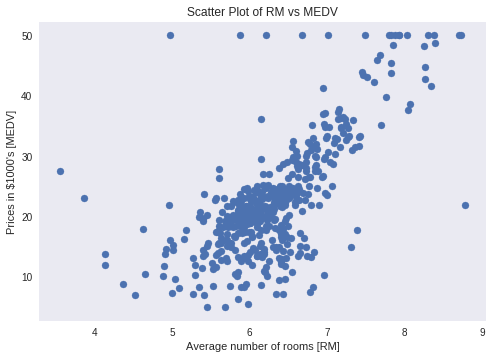

In [16]:
plt.scatter(boston_df['RM'], boston_df['MEDV']) # 平均部屋数と住宅価格の散布図をプロット

plt.title('Scatter Plot of RM vs MEDV')    # 図のタイトル
plt.xlabel('Average number of rooms [RM]') # x軸のラベル
plt.ylabel('Prices in $1000\'s [MEDV]')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()             

綺麗な相関図ですね、続いてNoxを見てみましょう

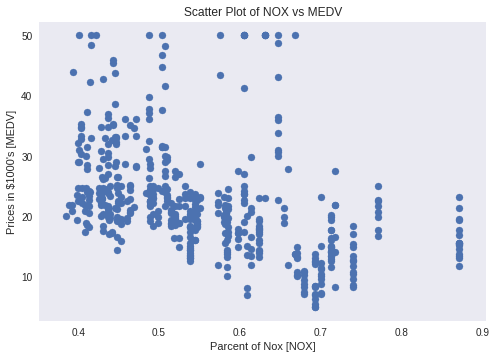

In [17]:
plt.scatter(boston_df['NOX'], boston_df['MEDV']) # Nox濃度と住宅価格の散布図をプロット

plt.title('Scatter Plot of NOX vs MEDV')    # 図のタイトル
plt.xlabel('Parcent of Nox [NOX]') # x軸のラベル
plt.ylabel('Prices in $1000\'s [MEDV]')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()         

これは怪しくなってきました。決定係数を高める為だけにNOx変数だけを用いるのは  
大丈夫なのでしょうか？
でもまだこの結果を元にモデルの作成までしてみていません。  
ひとまず結果が全てです。決定係数をあげる為だけにモデルを作成してみましょう！  

数値の高かった、  
CHAS(チャールズ川沿いかを表すダミー変数)    
NOX(窒素酸化物の濃度)  
RM(平均部屋数)  
DIS	(5つのボストンの雇用施設への重み付き距離)  
PTRATIO	(生徒と教師の割合)  
この5変数を用いましょう。

また比較の為にNOX変数のみのモデルも作成したいと思います。

In [18]:
# 説明変数と目的変数をそれぞれ取得
X_multi = pd.DataFrame(boston.data, columns=boston.feature_names)
Y_target = pd.DataFrame(boston.target)

X_multi = X_multi[['CHAS','NOX','RM','DIS','PTRATIO']]

# データセットのデータを8対2(テスト)に分割
X_train, X_test, y_train, y_test = train_test_split(X_multi, Y_target, test_size = 0.2, random_state = 0)

# オブジェクト生成
lreg = LinearRegression()

# モデルの作成
lreg.fit(X_multi,Y_target)

# scoreメソッドを使用して、決定係数を求めます。
score = lreg.score(X_test, y_test)
print("'CHAS','NOX','RM','DIS','PTRATIO'を利用した重回帰における住宅価格への決定係数は%.2f"%(score))

'CHAS','NOX','RM','DIS','PTRATIO'を利用した重回帰における住宅価格への決定係数は0.48


In [19]:
# 説明変数と目的変数をそれぞれ取得
X_multi = pd.DataFrame(boston.data, columns=boston.feature_names)
Y_target = pd.DataFrame(boston.target)

X_multi = X_multi['NOX']

# データセットのデータを8対2(テスト)に分割
X_train, X_test, y_train, y_test = train_test_split(X_multi[:, None], Y_target, test_size = 0.2, random_state = 0)

# オブジェクト生成
lreg = LinearRegression()

# モデルの作成
lreg.fit(X_multi[:, None],Y_target)

# scoreメソッドを使用して、決定係数を求めます。
score = lreg.score(X_test, y_test)
print("NOXのみを利用した重回帰における住宅価格への決定係数は%.2f"%(score))

NOXのみを利用した重回帰における住宅価格への決定係数は0.07


っ全然ダメな結果ですね。  
最初に確認した各変数がどの程度目的変数に影響しているかの確認の仕方が  
悪かったのでしょうか??  
とりあえず、結果そのものからアプローチをして良いモデルを導くのはやめて  
ランダムフォレストを用いて特徴量の重要度を測りたいと思います。  

In [20]:
from sklearn.ensemble import RandomForestRegressor

# データの取得
boston = load_boston()
# 説明変数と目的変数をそれぞれ取得
X_multi = pd.DataFrame(boston.data, columns=boston.feature_names)
Y_target = pd.DataFrame(boston.target)

rf = RandomForestRegressor()
rf.fit(X_multi, Y_target)

rfi = rf.feature_importances_

print('Feature Importances:')
for i, feat in enumerate(boston['feature_names']):
    print('\t{0:10s} : {1:>.6f}'.format(feat, rfi[i]))

Feature Importances:
	CRIM       : 0.032044
	ZN         : 0.000327
	INDUS      : 0.004697
	CHAS       : 0.001988
	NOX        : 0.023292
	RM         : 0.374179
	AGE        : 0.012836
	DIS        : 0.073922
	RAD        : 0.003136
	TAX        : 0.017079
	PTRATIO    : 0.014508
	B          : 0.013271
	LSTAT      : 0.428720


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


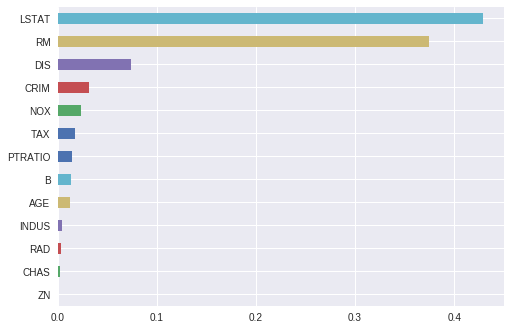

In [21]:
boston_predict = pd.Series(rfi, index = boston['feature_names'])
boston_predict.sort_values().plot.barh()

それらしい結果が返ってきましたね！  
CHASは直感的にも使えない変数だろうと思っていましたがその通りですね！  
トドメにヒートマップを用いて、目的変数と説明変数の相関をみてみます  

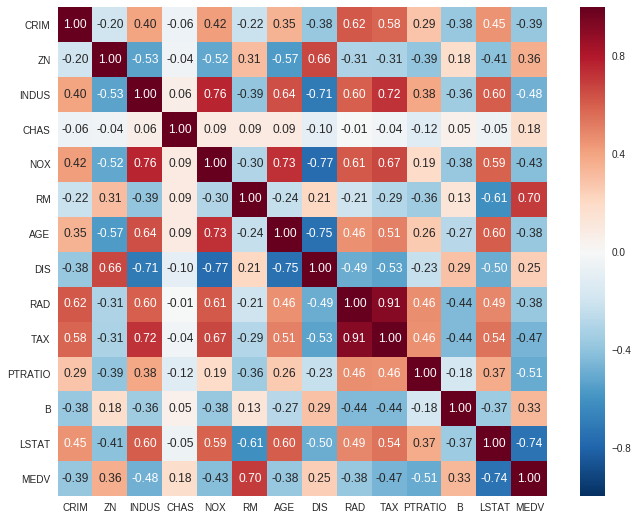

In [22]:
# ヒートマップ
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(boston_df.corr(), annot=True, square=True, fmt='.2f')

MEDV(target変数)に注目してください  
RMとLSTATが強い相関関係を示していますね！  
ランダムフォレストの結果とも類似しています。  
しかし他の変数については相関度とは順位が違ったりと気になりますね。  
という訳で、RMとLSTATの2変数だけ用いましょう！  

In [23]:
# RMとLSTATの特徴量を用いて決定係数を求めてみる

# データの取得
boston = load_boston()
# 説明変数と目的変数をそれぞれ取得
X_multi = pd.DataFrame(boston.data, columns=boston.feature_names)
Y_target = pd.DataFrame(boston.target)

X_multi = X_multi[['RM','LSTAT']]

# データセットのデータを8対2(テスト)に分割
X_train, X_test, y_train, y_test = train_test_split(X_multi, Y_target, test_size = 0.2, random_state = 0)

# オブジェクト生成
lreg = LinearRegression()

# モデルの作成
lreg.fit(X_train, y_train)

# scoreメソッドを使用して、決定係数を求めます。
score = lreg.score(X_test, y_test)
print("RMとLSTATを利用した重回帰における住宅価格への決定係数は%.2f"%(score))

RMとLSTATを利用した重回帰における住宅価格への決定係数は0.54


綺麗に0.71を越えないので、変数を増やします。  
CRIM	犯罪発生率  
DIS	5つのボストン市の雇用施設からの重み付き距離  
この2変数を追加します  


In [24]:
# RM,LSTAT,CRIM,DISの特徴量を用いて決定係数を求めてみる

# データの取得
boston = load_boston()
# 説明変数と目的変数をそれぞれ取得
X_multi = pd.DataFrame(boston.data, columns=boston.feature_names)
Y_target = pd.DataFrame(boston.target)

X_multi = X_multi[['RM','LSTAT','CRIM','DIS']]

# データセットのデータを8対2(テスト)に分割
X_train, X_test, y_train, y_test = train_test_split(X_multi, Y_target, test_size = 0.2, random_state = 0)

# オブジェクト生成
lreg = LinearRegression()

# モデルの作成
lreg.fit(X_train, y_train)

# scoreメソッドを使用して、決定係数を求めます。
score = lreg.score(X_test, y_test)
print("RM,LSTAT,CRIM,DISを利用した重回帰における住宅価格への決定係数は%.2f"%(score))

RM,LSTAT,CRIM,DISを利用した重回帰における住宅価格への決定係数は0.55


これでも越えません。  
次数を調整する必要がありそうですね！

### 最適な次数を見つける

In [25]:
score = []

for i in range(1,7):
    lin_nd = LinearRegression(normalize= True)
    degree_n = PolynomialFeatures(degree = i)
    X_train_n = degree_n.fit_transform(X_train)
    X_test_n = degree_n.fit_transform(X_test)
    lin_nd.fit(X_train_n,y_train)
    score.append([i,lin_nd.score(X_test_n,y_test)])

    
score.sort(key=lambda x: x[1])
score.reverse()

print("{0[0][0]}次元　:スコア {0[0][1]}".format(score))

2次元　:スコア 0.6840616805856354


これは悲しい。  
どの次元でも0.71を越えないようです。  
私が考えうるその他真っ当な改善手段は、変数を変えること、splitの比率を変えることくらいです。クロスバリデーションとか。  

#### と、悩んで色々と確認していたところ、
###最初の偏回帰係数の導き方が間違っていたようです！（やはりか！）  

それでは改めて、sklearnのStandardScalerを用いて標準化をさせます

In [26]:
# 重回帰式の係数でどれが高くなるか、データを標準化した上で調べる(全データで学習)

from sklearn.preprocessing import StandardScaler

# データの取得
boston = load_boston()
# 説明変数と目的変数をそれぞれ取得
X_multi = boston.data 
Y_target = boston.target

# Standardization
scaler = StandardScaler()
scaler.fit(X_multi)
X2 = scaler.transform(X_multi)
X2 = pd.DataFrame(X2)
X2.columns = boston.feature_names

# オブジェクト生成
lreg = LinearRegression()

# モデルの作成
lreg.fit(X2, Y_target)

coef_df = pd.DataFrame(boston.feature_names, columns=['Feature'])
coef_df['coefficient'] = pd.Series(np.abs(lreg.coef_))
coef_df

,Feature,coefficient
0,CRIM,0.920411
1,ZN,1.080981
2,INDUS,0.142967
3,CHAS,0.682203
4,NOX,2.060092
5,RM,2.670641
6,AGE,0.021121
7,DIS,3.104448
8,RAD,2.658787
9,TAX,2.075898


ここでスコアのよかったもの(coef 2以上)の変数を全て用いて、  
かつ最適な次元でのスコアを確認します

In [27]:
# NOX,RAD,TAX,RM,PTRATIO,LSTAT,DISの7特徴量を用いて決定係数を求めてみる

# データの取得
boston = load_boston()
# 説明変数と目的変数をそれぞれ取得
X_multi = pd.DataFrame(boston.data, columns=boston.feature_names)
Y_target = pd.DataFrame(boston.target)

X_multi = X_multi[['NOX','RAD','TAX','RM','PTRATIO','LSTAT','DIS']]

# データセットのデータを8対2(テスト)に分割
X_train, X_test, y_train, y_test = train_test_split(X_multi, Y_target, test_size = 0.2, random_state = 0)

# オブジェクト生成
lreg = LinearRegression()

# モデルの作成
lreg.fit(X_train, y_train)

# scoreメソッドを使用して、決定係数を求めます。
score = lreg.score(X_test, y_test)
print("NOX,RAD,TAX,RM,PTRATIO,LSTAT,DISの7特徴量を利用した重回帰における住宅価格への決定係数は%.2f"%(score))

NOX,RAD,TAX,RM,PTRATIO,LSTAT,DISの7特徴量を利用した重回帰における住宅価格への決定係数は0.55


In [28]:
score = []

for i in range(1,7):
    lin_nd = LinearRegression(normalize= True)
    degree_n = PolynomialFeatures(degree = i)
    X_train_n = degree_n.fit_transform(X_train)
    X_test_n = degree_n.fit_transform(X_test)
    lin_nd.fit(X_train_n,y_train)
    score.append([i,lin_nd.score(X_test_n,y_test)])

    
score.sort(key=lambda x: x[1])
score.reverse()

print("{0[0][0]}次元　:スコア {0[0][1]}".format(score))

3次元　:スコア 0.648585530192421


## 越えません！！！  


うーん、 ~~trainの分割がたまたま悪かった~~  
割合が悪いとか、やはりそういった分割の偏りが起こらないようクロスバリデーション  
を最初から行うべきだったでしょうか…。  
本格的な分析になり始めましたが、きっと間も無くゴールが見えるでしょう！  
なぜなら全力の手法を用いるからです

## scikit-learn を用いた交差検証（Cross-validation）とハイパーパラメータのチューニング（grid search）

クロスバリデーションを行うに伴って、グリッドサーチのライブラリもインポートします  

グリッドサーチ（grid search）は学習モデルに用いられるハイパーパラメータを調整します  
指定したパラメータの全ての組み合わせに対して学習を行い，もっとも良い精度を示したパラメータを採用する方法です．  
このパラメータを変更することでモデルの性能は著しく変化するため，適切な値を発見することが非常に重要なタスクとなります．  

このCross-validationとgrid searchを行うsklearnのライブラリがそれぞれ  
cross_validation と GridSearchCVになります。 
確実にスコアを出すために最初から全力で分析します  
ランダムフォレストによる識別器においてグリッドサーチを行い、  
クロスバリデーションで偏りなく分割学習を行いスコアの良いものを用いるという流れです。  

In [31]:
# 必要なライブラリのインポート
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

# データの取得
boston = load_boston()

# 説明変数と目的変数をそれぞれ取得
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 動かすパラメータを明示的に表示、今回は決定木の数を変えてみる
params = {'n_estimators'  : [3, 10, 100, 1000, 10000], 'n_jobs': [-1]}

# モデルにインスタンス生成
RFR = RandomForestRegressor()

# ハイパーパラメータ探索
cv = GridSearchCV(RFR, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

# 予測値を計算
y_train_pred = cv.predict(X_train)
y_test_pred = cv.predict(X_test)

# R^2（決定係数）の計算
from sklearn.metrics import r2_score
print('R^2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  s

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  s

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_tr

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  s

R^2 train : 0.984, test : 0.748


## ついにやりました！
0.74というスコアを出しました！  
ランダムフォレストもクロスバリデーションも用いたのもあり、飛躍的にスコアが  
伸びましたね。  
線形回帰ではなくなっていますが、立派な重回帰分析です！

## 重回帰について記述せよ

以下の観点をすべて含めて記述しましょう。

説明変数を増やすことでどのようなメリットがあるか  
適切な変数を増やすことでモデルの精度が上がることが期待できます。  
もしそれが適切な説明変数ならば、文字通り、目的変数を説明するのに使える方法も  
増えてくれることになります。  
もし、あなたが好きな人をなぜ好きかを一つの変数で説明し切れて満足できますでしょうかか！？  

説明変数を増やすことでどのようなデメリットがあるか  
特徴量の数が増えると、汎化性能（未知のデータの対応力）が下がりやすいと言われています。  
何でも入れて良いというわけではありません。  
「ゴミを入れればゴミが出てくる」のです。  
「特徴選択」や、「次元削減」も大事になってきます。